<a href="https://colab.research.google.com/github/lycheegreentea/Erythrocyte/blob/main/SYCCL_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
naseralqaydeh_named_entity_recognition_ner_corpus_path = kagglehub.dataset_download('naseralqaydeh/named-entity-recognition-ner-corpus')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/named-entity-recognition-ner-corpus/ner.csv


In [ ]:
import matplotlib.pyplot as plt
! pip install gensim

In [ ]:
#Load data
data = pd.read_csv('/kaggle/input/named-entity-recognition-ner-corpus/ner.csv')
df = pd.DataFrame(data)

sentence_column = df['Sentence'].str.replace(",", "").str.split()
POS_column = df['POS'].str.replace("[", "").str.replace("]", "").str.replace(",", "").str.replace("'", "").str.split()
tag_column = df['Tag'].str.replace("[", "").str.replace("]", "").str.replace(",", "").str.replace("'", "").str.split()

filtered_sentences = []

for i in range(len(sentence_column)):
    if (len(sentence_column[i]) == len(POS_column[i]) == len(tag_column[i])):
        filtered_sentences.append(sentence_column[i])

In [ ]:
#train the Word2Vec model
from gensim.models import Word2Vec
w2v = Word2Vec(filtered_sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=5)
w2v.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [ ]:
print(w2v.wv.most_similar('phone'))

#Annual is to time as ? is to bill
print(w2v.wv.most_similar(w2v.wv['annual'] - w2v.wv['time'] + w2v.wv['bill']))

#Words that are similar to computer and technology but are dissimilar to telephone
print(w2v.wv.most_similar(positive =['computer', 'technology'], negative=['telephone']))

[('satellite', 0.8101420998573303), ('card', 0.805048942565918), ('provision', 0.7991383671760559), ('pointed', 0.795537531375885), ('rubber', 0.7936351895332336), ('assessment', 0.7900135517120361), ('Bernanke', 0.7881787419319153), ('extends', 0.7842088341712952), ('particular', 0.7833229899406433), ('license', 0.7810386419296265)]
[('tycoon', 0.6273349523544312), ('Labor', 0.6105532050132751), ('giant', 0.5799310803413391), ('Commission', 0.561024010181427), ('Committee', 0.553236186504364), ('Treasury', 0.5356546640396118), ('state-run', 0.5259494185447693), ('Assistant', 0.5237606763839722), ('Reserve', 0.5230958461761475), ('Conference', 0.5115393400192261)]
[('export', 0.794506311416626), ('enriched', 0.7851362824440002), ('secretly', 0.7459267377853394), ('processing', 0.7448302507400513), ('produce', 0.7418395280838013), ('surveillance', 0.7367118000984192), ('producing', 0.7348605394363403), ('develop', 0.7332958579063416), ('ingredient', 0.7323940992355347), ('components', 0

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ words for words in model.vocab ]

    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)



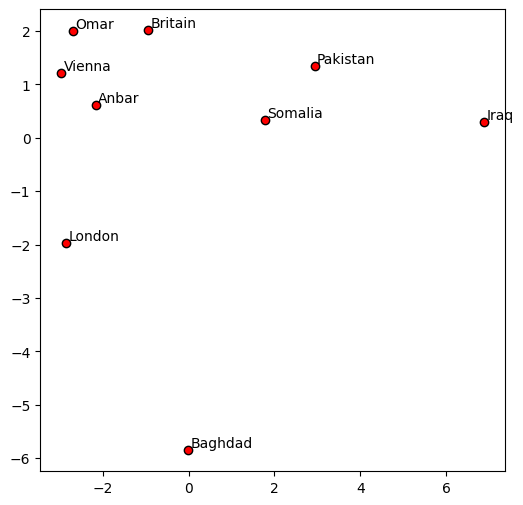

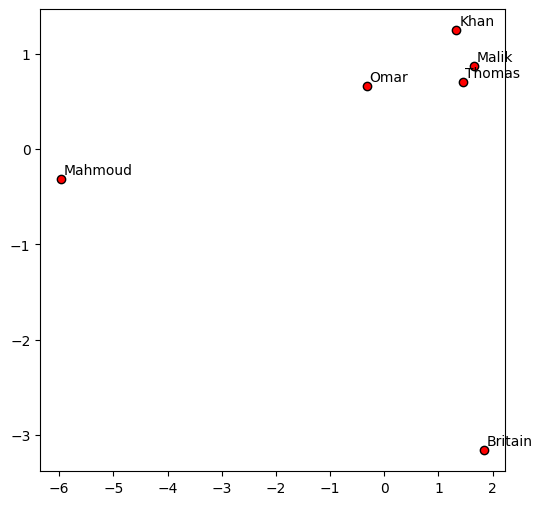

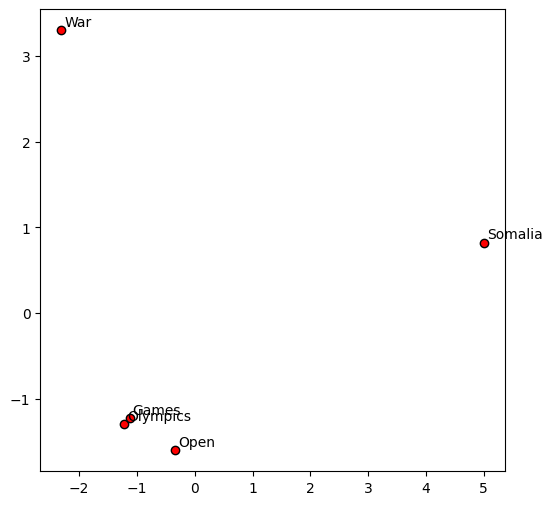

In [ ]:
#compares words of the same entity
#geographical entity
display_pca_scatterplot(w2v, ['Britain', 'Iraq', 'London', 'Somalia', 'Pakistan', 'Baghdad', 'Vienna', 'Anbar', "Omar" ])
#person
display_pca_scatterplot(w2v, ['Mahmoud', 'Thomas', 'Omar', 'Malik', 'Khan', "Britain" ])
#Events
display_pca_scatterplot(w2v, ['Olympics', 'Games', 'War', 'Open', "Somalia"])

In [ ]:
words = w2v.wv.index_to_key
print("Out of Wednesday(tim), Saturday(tim), and Brotherhood(org), "+w2v.wv.doesnt_match(['Wednesday', 'Saturday', 'Brotherhood'])+" doesn't match")
print("Out of Agency(org), Union(org), and Friday(tim) "+w2v.wv.doesnt_match(['Agency', 'Union', 'Friday'])+" doesn't match")

Out of Wednesday(tim), Saturday(tim), and Brotherhood(org), Brotherhood doesn't match
Out of Agency(org), Union(org), and Friday(tim) Friday doesn't match
